In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
from pyplier import PLIER, PLIERResults
from pyplier.plotting import plotMat, plotTopZ, plotTopZallPath

/home/milo/.cache/pypoetry/virtualenvs/pyplier-Idb-akax-py3.9/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [224]:
import seaborn as sns
import matplotlib.colors as mcolors
from matplotlib import rc_context
from matplotlib.pyplot import gcf

In [3]:
pr = PLIERResults.from_disk("pbmc3k_plier_res.json.gz")

In [5]:
import scanpy as sc

In [6]:
pbmc3k = sc.datasets.pbmc3k_processed()

In [7]:
reactome = pd.read_csv("reactome.csv.gz", index_col="genes")

In [8]:
pbmc3k_df = pd.DataFrame(pbmc3k.X, index=pbmc3k.obs_names, columns=pbmc3k.var_names).T

In [9]:
pr.Z

,LV1,LV2,LV3,LV4,LV5,LV6,LV7,LV8,LV9,LV10,...,LV115,LV116,LV117,LV118,LV119,LV120,LV121,LV122,LV123,LV124
TNFRSF4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.044276,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.040342,0.013688,0.080564,0.00000,0.000000,0.212972,0.000000,0.000000
TNFRSF25,0.000000,0.016871,0.000000,0.000000,0.000000,0.000000,0.005957,0.000000,0.000000,0.000000,...,0.044741,0.000000,0.006245,0.194389,0.209431,0.00000,0.000000,0.000000,0.000000,0.000000
TNFRSF9,0.000000,0.000000,0.000000,0.037451,0.080067,0.039730,0.100764,0.000000,0.149938,0.000000,...,0.025976,0.000000,0.000000,0.000000,0.409691,0.00000,0.199765,0.000000,0.000000,0.050133
CTNNBIP1,0.854421,0.000000,0.191284,0.000000,0.000000,0.032648,0.175188,0.054330,0.339056,0.000000,...,0.000000,0.000000,0.084658,0.000000,0.181540,0.02617,0.000000,0.000000,0.000000,0.000000
SRM,0.000000,0.029048,0.000000,0.035224,0.000000,0.000000,0.026450,0.000000,0.177348,0.000000,...,0.000000,0.000000,0.056904,0.000000,0.150745,0.00000,0.000000,0.278494,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SIK1,0.349600,0.000000,0.014777,0.009680,0.240957,0.000000,0.018993,0.000000,0.107856,0.000000,...,0.000000,0.000000,0.000000,0.092833,0.122562,0.00000,0.000000,0.125950,0.000000,0.000000
ICOSLG,0.195446,0.000000,0.000000,0.383117,0.000000,0.003506,0.053925,2.267537,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.605769,0.140492
SUMO3,0.067891,0.340117,0.243247,0.000000,0.000000,0.000000,0.000000,0.000000,0.189404,0.338948,...,0.029979,0.000000,0.000000,0.000000,0.000000,0.00000,0.547261,0.000000,0.000000,0.130090
SLC19A1,0.045601,0.006868,0.000000,0.063834,0.000000,0.000000,0.000000,0.001981,0.063142,0.000000,...,0.000000,0.000000,0.000000,0.097701,0.000000,0.00000,0.000000,0.000000,0.000000,0.167966


In [10]:
plierRes = pr
data = pbmc3k_df
priorMat = reactome
top = 10
index = None
regress = False
allLVs = False

In [11]:
data = data.loc[plierRes.Z.index, :]
priorMat = priorMat.loc[plierRes.Z.index.intersection(priorMat.index), :]
plierRes.U.columns[np.where(plierRes.U.sum(axis=0) > 0)]

if allLVs:
    if index is not None:
        ii = plierRes.U.columns.intersection(index) # use `intersection` so we don't have an issue with trying to plot non-existent LVs
    else:
        ii = plierRes.U.columns
elif index is not None:
    ii = plierRes.U.columns[plierRes.U.sum() > 0].intersection(index)
else:
    ii = plierRes.U.columns[plierRes.U.sum() > 0]

In [ ]:
z_ranks = plierRes.Z.loc[:, ii].rank(ascending=False)
nnz_ranks = [z_ranks[i].index[[z_ranks[i] <= top]].values for i in ii]

In [12]:
z_ranks

,LV1,LV2,LV3,LV4,LV5,LV6,LV7,LV8,LV9,LV11,...,LV110,LV112,LV115,LV117,LV118,LV119,LV120,LV122,LV123,LV124
TNFRSF4,744.0,735.5,837.5,768.0,749.0,728.5,247.0,779.5,724.0,751.0,...,689.0,678.0,774.0,332.0,380.0,239.0,705.5,114.0,679.0,738.0
TNFRSF25,744.0,337.0,837.5,768.0,749.0,728.5,353.0,779.5,724.0,751.0,...,247.0,678.0,245.0,511.0,140.0,112.0,705.5,690.5,679.0,738.0
TNFRSF9,744.0,735.5,837.5,381.0,305.0,209.0,136.0,779.5,152.0,751.0,...,3.0,678.0,341.0,805.5,730.0,33.0,705.5,690.5,679.0,338.0
CTNNBIP1,44.0,735.5,221.0,768.0,749.0,234.0,83.0,284.0,45.0,751.0,...,103.0,253.0,774.0,134.0,730.0,126.0,285.0,690.5,679.0,738.0
SRM,744.0,284.0,837.5,385.0,749.0,728.5,294.0,779.5,129.0,274.0,...,689.0,678.0,774.0,242.0,730.0,149.0,705.5,74.0,679.0,738.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SIK1,101.0,735.5,575.0,447.0,145.0,728.5,320.0,779.5,204.0,210.0,...,70.0,678.0,774.0,805.5,254.0,176.0,705.5,177.0,679.0,738.0
ICOSLG,180.0,735.5,837.5,62.0,749.0,379.0,217.0,45.0,724.0,751.0,...,689.0,678.0,774.0,805.5,730.0,728.0,705.5,690.5,15.0,225.0
SUMO3,315.0,68.0,150.0,768.0,749.0,728.5,713.5,779.5,122.0,751.0,...,689.0,678.0,322.0,805.5,730.0,728.0,705.5,690.5,679.0,236.0
SLC19A1,352.0,376.0,837.5,321.0,749.0,728.5,713.5,497.0,283.0,44.0,...,65.0,678.0,774.0,805.5,248.0,728.0,705.5,690.5,679.0,201.0


In [13]:
plierRes.Z.loc[:,ii]

,LV1,LV2,LV3,LV4,LV5,LV6,LV7,LV8,LV9,LV11,...,LV110,LV112,LV115,LV117,LV118,LV119,LV120,LV122,LV123,LV124
TNFRSF4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.044276,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.040342,0.013688,0.080564,0.00000,0.212972,0.000000,0.000000
TNFRSF25,0.000000,0.016871,0.000000,0.000000,0.000000,0.000000,0.005957,0.000000,0.000000,0.000000,...,0.057410,0.00000,0.044741,0.006245,0.194389,0.209431,0.00000,0.000000,0.000000,0.000000
TNFRSF9,0.000000,0.000000,0.000000,0.037451,0.080067,0.039730,0.100764,0.000000,0.149938,0.000000,...,1.031746,0.00000,0.025976,0.000000,0.000000,0.409691,0.00000,0.000000,0.000000,0.050133
CTNNBIP1,0.854421,0.000000,0.191284,0.000000,0.000000,0.032648,0.175188,0.054330,0.339056,0.000000,...,0.227116,0.02447,0.000000,0.084658,0.000000,0.181540,0.02617,0.000000,0.000000,0.000000
SRM,0.000000,0.029048,0.000000,0.035224,0.000000,0.000000,0.026450,0.000000,0.177348,0.031450,...,0.000000,0.00000,0.000000,0.056904,0.000000,0.150745,0.00000,0.278494,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SIK1,0.349600,0.000000,0.014777,0.009680,0.240957,0.000000,0.018993,0.000000,0.107856,0.045742,...,0.287649,0.00000,0.000000,0.000000,0.092833,0.122562,0.00000,0.125950,0.000000,0.000000
ICOSLG,0.195446,0.000000,0.000000,0.383117,0.000000,0.003506,0.053925,2.267537,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.605769,0.140492
SUMO3,0.067891,0.340117,0.243247,0.000000,0.000000,0.000000,0.000000,0.000000,0.189404,0.000000,...,0.000000,0.00000,0.029979,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.130090
SLC19A1,0.045601,0.006868,0.000000,0.063834,0.000000,0.000000,0.000000,0.001981,0.063142,0.124247,...,0.298376,0.00000,0.000000,0.000000,0.097701,0.000000,0.00000,0.000000,0.000000,0.167966


In [16]:
nn = np.concatenate(nnz_ranks)

In [17]:
len(nn)

870

In [211]:
nncol = (
    plierRes.B.index[plierRes.Z.columns.isin(ii)]
    .repeat([len(_) for _ in nnz_ranks])
)

In [212]:
nncol

Index(['1,REACTOME_CELLULAR_RESPONSE_TO_CHEMICAL_STRESS',
       '1,REACTOME_CELLULAR_RESPONSE_TO_CHEMICAL_STRESS',
       '1,REACTOME_CELLULAR_RESPONSE_TO_CHEMICAL_STRESS',
       '1,REACTOME_CELLULAR_RESPONSE_TO_CHEMICAL_STRESS',
       '1,REACTOME_CELLULAR_RESPONSE_TO_CHEMICAL_STRESS',
       '1,REACTOME_CELLULAR_RESPONSE_TO_CHEMICAL_STRESS',
       '1,REACTOME_CELLULAR_RESPONSE_TO_CHEMICAL_STRESS',
       '1,REACTOME_CELLULAR_RESPONSE_TO_CHEMICAL_STRESS',
       '1,REACTOME_CELLULAR_RESPONSE_TO_CHEMICAL_STRESS',
       '1,REACTOME_CELLULAR_RESPONSE_TO_CHEMICAL_STRESS',
       ...
       '124,REACTOME_AMYLOID_FIBER_FORMATION',
       '124,REACTOME_AMYLOID_FIBER_FORMATION',
       '124,REACTOME_AMYLOID_FIBER_FORMATION',
       '124,REACTOME_AMYLOID_FIBER_FORMATION',
       '124,REACTOME_AMYLOID_FIBER_FORMATION',
       '124,REACTOME_AMYLOID_FIBER_FORMATION',
       '124,REACTOME_AMYLOID_FIBER_FORMATION',
       '124,REACTOME_AMYLOID_FIBER_FORMATION',
       '124,REACTOME_AMYLOID_FIBE

In [21]:
arrays = [
    list(nncol),
    list(nn),
]

In [22]:
tuples = list(zip(*arrays))

In [221]:
len(list(zip(*[list(nncol), list(nn)])))

870

In [24]:
tuples[:5]

[('1,REACTOME_CELLULAR_RESPONSE_TO_CHEMICAL_STRESS', 'S100A12'),
 ('1,REACTOME_CELLULAR_RESPONSE_TO_CHEMICAL_STRESS', 'S100A8'),
 ('1,REACTOME_CELLULAR_RESPONSE_TO_CHEMICAL_STRESS', 'GPX1'),
 ('1,REACTOME_CELLULAR_RESPONSE_TO_CHEMICAL_STRESS', 'FCN1'),
 ('1,REACTOME_CELLULAR_RESPONSE_TO_CHEMICAL_STRESS', 'FOLR3')]

In [25]:
pd.MultiIndex.from_tuples(tuples, names=["pathway","gene"])

MultiIndex([('1,REACTOME_CELLULAR_RESPONSE_TO_CHEMICAL_STRESS',  'S100A12'),
            ('1,REACTOME_CELLULAR_RESPONSE_TO_CHEMICAL_STRESS',   'S100A8'),
            ('1,REACTOME_CELLULAR_RESPONSE_TO_CHEMICAL_STRESS',     'GPX1'),
            ('1,REACTOME_CELLULAR_RESPONSE_TO_CHEMICAL_STRESS',     'FCN1'),
            ('1,REACTOME_CELLULAR_RESPONSE_TO_CHEMICAL_STRESS',    'FOLR3'),
            ('1,REACTOME_CELLULAR_RESPONSE_TO_CHEMICAL_STRESS',    'ASGR1'),
            ('1,REACTOME_CELLULAR_RESPONSE_TO_CHEMICAL_STRESS',      'GRN'),
            ('1,REACTOME_CELLULAR_RESPONSE_TO_CHEMICAL_STRESS',     'CST3'),
            ('1,REACTOME_CELLULAR_RESPONSE_TO_CHEMICAL_STRESS',   'TYROBP'),
            ('1,REACTOME_CELLULAR_RESPONSE_TO_CHEMICAL_STRESS',   'LGALS1'),
            ...
            (           '124,REACTOME_AMYLOID_FIBER_FORMATION',   'FCER1G'),
            (           '124,REACTOME_AMYLOID_FIBER_FORMATION',     'FCN1'),
            (           '124,REACTOME_AMYLOID_FIBER_FORMATIO

In [264]:
# toplot.index = pd.MultiIndex.from_tuples(tuples, names=["pathway","gene"])

In [27]:
toplot = data.loc[nn,:]

In [28]:
nnpath = pd.concat(
        [
            priorMat.loc[x, plierRes.U.loc[plierRes.U.loc[:, y] > 0, y].index].sum(
                axis=1
            )
            > 0
            for x, y in zip(nnz_ranks, ii)
        ],
        axis=0,
    )

In [222]:
nnpath

S100A12     False
S100A8       True
GPX1         True
FCN1        False
FOLR3       False
            ...  
CST3         True
TYROBP       True
APOBEC3A    False
APOBEC3B    False
TYMP        False
Length: 870, dtype: bool

In [30]:
nnz_ranks[0]

array(['S100A12', 'S100A8', 'GPX1', 'FCN1', 'FOLR3', 'ASGR1', 'GRN',
       'CST3', 'TYROBP', 'LGALS1'], dtype=object)

In [31]:
ii[0]

'LV1'

In [32]:
priorMat.loc[nnz_ranks[0], plierRes.U.loc[plierRes.U.loc[:, 'LV1'] > 0, 'LV1'].index].sum(axis=1) > 0

S100A12    False
S100A8      True
GPX1        True
FCN1       False
FOLR3      False
ASGR1      False
GRN        False
CST3        True
TYROBP      True
LGALS1     False
dtype: bool

In [33]:
nnpath_list = [
    priorMat.loc[x, plierRes.U.loc[plierRes.U.loc[:, y] > 0, y].index].sum(
        axis=1
    )
    > 0
    for x, y in zip(nnz_ranks, ii)
]

In [34]:
len(nnpath_list)

87

In [35]:
nnpath = pd.concat(nnpath_list)

In [36]:
nnpath

S100A12     False
S100A8       True
GPX1         True
FCN1        False
FOLR3       False
            ...  
CST3         True
TYROBP       True
APOBEC3A    False
APOBEC3B    False
TYMP        False
Length: 870, dtype: bool

In [37]:
nnindex = ii.repeat([len(_) for _ in nnz_ranks])

In [38]:
nnindex

Index(['LV1', 'LV1', 'LV1', 'LV1', 'LV1', 'LV1', 'LV1', 'LV1', 'LV1', 'LV1',
       ...
       'LV124', 'LV124', 'LV124', 'LV124', 'LV124', 'LV124', 'LV124', 'LV124',
       'LV124', 'LV124'],
      dtype='object', length=870)

In [41]:
nnrep = np.unique(nn)[np.unique(nn, return_counts=True)[1] > 1]

In [43]:
nnrep_im = np.intersect1d(nn, nnrep, return_indices=True)[1]

In [44]:
nn_reduced = np.delete(nn, nnrep_im)

In [45]:
nncol_reduced = np.delete(nncol, nnrep_im)

In [46]:
nnpath_reduced = nnpath.drop(nnrep)

In [47]:
nnindex_reduced = np.delete(nnindex, nnrep_im)

In [48]:
nnpath_reduced.replace({True: "inPathway", False: "notInPathway"}, inplace=True)

In [49]:
# if len(nnrep) > 0:
#     nnrep_im = np.intersect1d(nn, nnrep, return_indices=True)[1]
#     nn = np.delete(nn, nnrep_im)
#     nncol = np.delete(nncol, nnrep_im)
#     nnpath.drop(nnrep, inplace=True)
#     nnindex = np.delete(nnindex, nnrep_im)

# nnpath.replace({True: "inPathway", False: "notInPathway"}, inplace=True)

In [50]:
nncol = pd.DataFrame({"pathway": nncol, "present": nnpath})

In [51]:
from pyplier.utils import rowNorm

In [153]:
# toPlot = rowNorm(data.loc[nn_reduced, :])

In [52]:
present_lut = {
        "inPathway": mcolors.to_rgb(mcolors.CSS4_COLORS["black"]),
        "notInPathway": mcolors.to_rgb(mcolors.CSS4_COLORS["beige"]),
    }

In [53]:
pathway_pal = sns.husl_palette(nncol["pathway"].nunique(), s=2)
pathway_lut = {x: y for x, y in zip(nncol["pathway"].unique(), pathway_pal)}

nncol = nncol.replace({True: "inPathway", False: "notinPathway"})
row_annotations = pd.DataFrame(
    {
        "pathway": nncol["pathway"].map(pathway_lut),
        "present": nncol["present"].map(present_lut),
    }
)

In [55]:
pathway_pal = sns.husl_palette(nncol["pathway"].nunique(), s=2, l=0.5)

In [185]:
sns.cubehelix_palette(hue=1)

[[0.9513414298764558, 0.812495126471049, 0.7836900237937333],
 [0.8924963453452945, 0.6249231592216553, 0.666822921053235],
 [0.7825110491257043, 0.45350322265124104, 0.6027953147219278],
 [0.616114036533673, 0.31633906431152836, 0.5445323561905262],
 [0.4011377052299693, 0.205538735973747, 0.4417011591618498],
 [0.18160330415824133, 0.11074538937567616, 0.26544496226217196]]

In [177]:
pathway_pal = sns.cubehelix_palette(nncol["pathway"].nunique(), hue=1)

In [178]:
pathway_pal

[[0.9513414298764558, 0.812495126471049, 0.7836900237937333],
 [0.9488731000875075, 0.8020509077554094, 0.7751396238041234],
 [0.9463504682631502, 0.7915842781364053, 0.766857525240543],
 [0.9437652845647941, 0.7811001593409768, 0.7588398292066553],
 [0.9411094853326762, 0.7706034325417247, 0.7510823465645408],
 [0.9383751999804465, 0.760098933637385, 0.7435806044451966],
 [0.9355547576898597, 0.7495914485945068, 0.7363298529759388],
 [0.9326406939010282, 0.7390857088537275, 0.7293250722188847],
 [0.9280782537287524, 0.7233405752901086, 0.7192674698239551],
 [0.9248988884175967, 0.7128595003865017, 0.7128539463135812],
 [0.921601488687606, 0.7023962367461508, 0.7066668018843217],
 [0.9181795927616087, 0.6919552154939131, 0.7006998925241817],
 [0.9146269769745015, 0.6815407892645303, 0.6949468458180318],
 [0.9109376608346771, 0.6711572281077507, 0.6894010691072556],
 [0.9071059118519667, 0.6608087154817067, 0.6840557578127869],
 [0.9031262501289316, 0.6504993443374383, 0.6789039039146991],
 [0.898993452712501, 0.6402331132973779, 0.6739383045814079],
 [0.8947025577031323, 0.6300139229305453, 0.6691515709414579],
 [0.8902488681188419, 0.6198455721271304, 0.6645361369907717],
 [0.8856279555116321, 0.6097317545750621, 0.660084268628157],
 [0.8783740261046797, 0.5946710899083609, 0.6536958443516421],
 [0.8733174734294542, 0.5847090444191999, 0.6496180330579749],
 [0.8680803591934274, 0.5748135832322636, 0.6456755274351585],
 [0.8626595013568245, 0.5649878858816298, 0.6418599518294974],
 [0.8570520017847157, 0.5552350092522118, 0.6381628141489438],
 [0.8512552482061087, 0.5455578847772917, 0.6345755155516141],
 [0.8452669159126276, 0.5359593157550381, 0.631089360206318],
 [0.8390849691958556, 0.526441974785922, 0.6276955651173807],
 [0.8327076625225933, 0.5170084013328549, 0.6243852700059891],
 [0.8261335414474806, 0.5076609994057855, 0.621149547240269],
 [0.8193614432626086, 0.49840203537240363, 0.6179794118062716],
 [0.8123904973839382, 0.4892336358965068, 0.6148658313120197],
 [0.8015600539103045, 0.47565514830051603, 0.6102816532843718],
 [0.7940900974549142, 0.46672153048135373, 0.6072697230496926],
 [0.7864205461440055, 0.45788479365524887, 0.604282506213148],
 [0.7785518416826407, 0.44914641379909515, 0.6013108814726192],
 [0.7704847153298939, 0.4405077181896631, 0.5983457354094669],
 [0.7622201865828556, 0.4319698842033091, 0.5953779725155814],
 [0.7537595616019754, 0.42353393825204555, 0.5923985251944738],
 [0.7451044313791337, 0.41520075485672664, 0.5893983637285835],
 [0.7362566696500067, 0.4069710558580044, 0.5863685062050059],
 [0.7272184305524763, 0.3988454097656152, 0.5833000283918731],
 [0.7179921460330141, 0.39082423124645643, 0.58018407355766],
 [0.7085805230031423, 0.3829077807518135, 0.5770118622257294],
 [0.694122168368819, 0.3712296596778042, 0.5721290755008669],
 [0.6842608177028398, 0.3635751549510584, 0.5687784068475601],
 [0.6742257212325209, 0.3560250732709436, 0.5653415009543883],
 [0.6640207814432619, 0.3485789802462096, 0.5618100445856655],
 [0.6536501557895023, 0.34123628771388487, 0.5581758539144128],
 [0.6431182522900929, 0.3339962542729926, 0.5544308836723351],
 [0.632429724895065, 0.32685798595698207, 0.5505672361792341],
 [0.621589468627345, 0.31982043704440083, 0.5465771702447323],
 [0.6106026145031294, 0.31288241100723074, 0.5424531099352667],
 [0.5994745242347914, 0.3060425615962151, 0.5381876531994063],
 [0.588210784720346, 0.299299394062406, 0.5337735803446431],
 [0.5710735930894478, 0.28936228977318007, 0.5268584940263034],
 [0.5594965987533211, 0.28285332548399056, 0.5220425660989378],
 [0.5478051982344204, 0.27643466281565193, 0.5170543078687098],
 [0.5360059180657023, 0.27010415749269523, 0.5118874208408748],
 [0.5241054760367554, 0.2638595258498424, 0.5065358325511041],
 [0.5121107744043322, 0.25769834691357785, 0.5009937039173995],
 [0.500028892924316, 0.25161806461111996, 0.4952554363956766],
 [0.4878670817103572, 0.2456159901052188, 0.4893156789331734],
 [0.47563275392454196, 0.239689

In [56]:
np.random.shuffle(pathway_pal)

In [57]:
pathway_lut = {x: y for x, y in zip(nncol["pathway"].unique(), pathway_pal)}

In [58]:
row_annotations = pd.DataFrame(nncol['pathway'].map(pathway_lut))
row_annotations

,pathway
S100A12,"(0.0, 0.5630925505675018, 0.5942965233685282)"
S100A8,"(0.0, 0.5630925505675018, 0.5942965233685282)"
GPX1,"(0.0, 0.5630925505675018, 0.5942965233685282)"
FCN1,"(0.0, 0.5630925505675018, 0.5942965233685282)"
FOLR3,"(0.0, 0.5630925505675018, 0.5942965233685282)"
...,...
CST3,"(0.0, 0.580315120182253, 0.0)"
TYROBP,"(0.0, 0.580315120182253, 0.0)"
APOBEC3A,"(0.0, 0.580315120182253, 0.0)"
APOBEC3B,"(0.0, 0.580315120182253, 0.0)"


In [59]:
import matplotlib.pyplot as plt

In [60]:
nncol

,pathway,present
S100A12,"1,REACTOME_CELLULAR_RESPONSE_TO_CHEMICAL_STRESS",notinPathway
S100A8,"1,REACTOME_CELLULAR_RESPONSE_TO_CHEMICAL_STRESS",inPathway
GPX1,"1,REACTOME_CELLULAR_RESPONSE_TO_CHEMICAL_STRESS",inPathway
FCN1,"1,REACTOME_CELLULAR_RESPONSE_TO_CHEMICAL_STRESS",notinPathway
FOLR3,"1,REACTOME_CELLULAR_RESPONSE_TO_CHEMICAL_STRESS",notinPathway
...,...,...
CST3,"124,REACTOME_AMYLOID_FIBER_FORMATION",inPathway
TYROBP,"124,REACTOME_AMYLOID_FIBER_FORMATION",inPathway
APOBEC3A,"124,REACTOME_AMYLOID_FIBER_FORMATION",notinPathway
APOBEC3B,"124,REACTOME_AMYLOID_FIBER_FORMATION",notinPathway


In [61]:
toplot

index,AAACATACAACCAC-1,AAACATTGAGCTAC-1,AAACATTGATCAGC-1,AAACCGTGCTTCCG-1,AAACCGTGTATGCG-1,AAACGCACTGGTAC-1,AAACGCTGACCAGT-1,AAACGCTGGTTCTT-1,AAACGCTGTAGCCA-1,AAACGCTGTTTCTG-1,...,TTTCAGTGTCACGA-1,TTTCAGTGTCTATC-1,TTTCAGTGTGCAGT-1,TTTCCAGAGGTGAG-1,TTTCGAACACCTGA-1,TTTCGAACTCTCAT-1,TTTCTACTGAGGCA-1,TTTCTACTTCCTCG-1,TTTGCATGAGAGGC-1,TTTGCATGCCTCAC-1
S100A12,-0.355626,-0.399636,-0.042569,-0.173616,-0.144162,-0.174861,-0.472325,-0.370693,-0.129993,-0.373055,...,-0.432934,-0.315494,-0.227909,-0.038841,-0.066247,-0.203539,-0.040511,-0.260809,-0.257993,-0.060705
S100A8,-0.700971,-0.894284,-0.391860,1.072773,-0.380300,-0.483295,-0.817785,-0.708665,-0.381493,1.456456,...,-0.742120,2.056366,-0.494034,0.748639,-0.494219,2.059213,-0.406702,-0.551985,-0.510468,-0.344824
GPX1,-0.872348,-1.357178,-0.832521,1.489839,-0.487691,0.704340,-0.892267,0.547356,-0.534445,-0.638230,...,-0.769669,1.457088,1.179275,-0.652560,1.945501,1.652882,-0.886220,-0.683240,-0.559004,-0.627148
FCN1,-0.774649,-1.409621,-0.601239,0.594629,-0.201695,-0.514841,-0.845755,-0.753729,-0.255712,-0.483185,...,-0.674116,2.040034,1.299289,-0.370487,-0.019066,1.993707,-0.668851,-0.496551,-0.337158,-0.346676
FOLR3,-0.308542,-0.403773,-0.155026,-0.213501,-0.149864,-0.200639,-0.366548,-0.312400,-0.150378,-0.280768,...,-0.329160,-0.244003,-0.206188,-0.125614,-0.205452,-0.253506,-0.162310,-0.234837,-0.214418,-0.132003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CST3,-0.954149,-1.207683,0.064473,1.944134,-0.174924,-0.636003,-1.013345,-0.916248,-0.262531,2.157494,...,-0.769980,2.388791,-0.401761,0.961915,0.693236,1.595684,-0.080592,-0.572689,-0.332685,0.685665
TYROBP,-0.947659,-1.649799,-0.751388,1.594738,1.183545,-0.657927,-1.027964,-0.924774,-0.370983,0.802871,...,-0.837756,1.008765,-0.503755,-0.496411,0.531519,1.273566,0.016754,-0.639010,-0.462880,-0.470435
APOBEC3A,-0.477737,-1.155532,-0.428293,-0.396270,0.056459,-0.273753,-0.503269,-0.447963,-0.009274,-0.149658,...,-0.332445,-0.062791,-0.095730,-0.176451,-0.785584,-0.631736,-0.503503,-0.214926,-0.041073,-0.140438
APOBEC3B,-0.289052,-0.751574,-0.177064,-0.188831,0.120122,-0.107550,-0.335527,-0.273027,0.079923,-0.074955,...,-0.211812,-0.002565,-0.002384,-0.008397,-0.420998,-0.353207,-0.226634,-0.090076,0.026420,0.010066


In [68]:
pd.MultiIndex.from_tuples(tuples, names=["pathway","gene"])

MultiIndex([('1,REACTOME_CELLULAR_RESPONSE_TO_CHEMICAL_STRESS',  'S100A12'),
            ('1,REACTOME_CELLULAR_RESPONSE_TO_CHEMICAL_STRESS',   'S100A8'),
            ('1,REACTOME_CELLULAR_RESPONSE_TO_CHEMICAL_STRESS',     'GPX1'),
            ('1,REACTOME_CELLULAR_RESPONSE_TO_CHEMICAL_STRESS',     'FCN1'),
            ('1,REACTOME_CELLULAR_RESPONSE_TO_CHEMICAL_STRESS',    'FOLR3'),
            ('1,REACTOME_CELLULAR_RESPONSE_TO_CHEMICAL_STRESS',    'ASGR1'),
            ('1,REACTOME_CELLULAR_RESPONSE_TO_CHEMICAL_STRESS',      'GRN'),
            ('1,REACTOME_CELLULAR_RESPONSE_TO_CHEMICAL_STRESS',     'CST3'),
            ('1,REACTOME_CELLULAR_RESPONSE_TO_CHEMICAL_STRESS',   'TYROBP'),
            ('1,REACTOME_CELLULAR_RESPONSE_TO_CHEMICAL_STRESS',   'LGALS1'),
            ...
            (           '124,REACTOME_AMYLOID_FIBER_FORMATION',   'FCER1G'),
            (           '124,REACTOME_AMYLOID_FIBER_FORMATION',     'FCN1'),
            (           '124,REACTOME_AMYLOID_FIBER_FORMATIO

In [189]:
new_row_annotations = row_annotations.set_index(pd.MultiIndex.from_tuples(tuples, names=["pathway","gene"]))

In [196]:
sns.color_palette("hls", n_colors=87)

[(0.86, 0.3712, 0.33999999999999997),
 (0.86, 0.4070620689655172, 0.33999999999999997),
 (0.86, 0.44292413793103447, 0.33999999999999997),
 (0.86, 0.4787862068965517, 0.33999999999999997),
 (0.86, 0.514648275862069, 0.33999999999999997),
 (0.86, 0.5505103448275861, 0.33999999999999997),
 (0.86, 0.5863724137931035, 0.33999999999999997),
 (0.86, 0.6222344827586206, 0.33999999999999997),
 (0.86, 0.658096551724138, 0.33999999999999997),
 (0.86, 0.6939586206896551, 0.33999999999999997),
 (0.86, 0.7298206896551723, 0.33999999999999997),
 (0.86, 0.7656827586206897, 0.33999999999999997),
 (0.86, 0.8015448275862069, 0.33999999999999997),
 (0.86, 0.8374068965517241, 0.33999999999999997),
 (0.8467310344827587, 0.86, 0.33999999999999997),
 (0.8108689655172411, 0.86, 0.33999999999999997),
 (0.7750068965517243, 0.86, 0.33999999999999997),
 (0.7391448275862067, 0.86, 0.33999999999999997),
 (0.7032827586206895, 0.86, 0.33999999999999997),
 (0.6674206896551722, 0.86, 0.33999999999999997),
 (0.6315586206896551, 0.86, 0.33999999999999997),
 (0.5956965517241379, 0.86, 0.33999999999999997),
 (0.5598344827586204, 0.86, 0.33999999999999997),
 (0.5239724137931034, 0.86, 0.33999999999999997),
 (0.4881103448275859, 0.86, 0.33999999999999997),
 (0.45224827586206906, 0.86, 0.33999999999999997),
 (0.41638620689655154, 0.86, 0.33999999999999997),
 (0.38052413793103435, 0.86, 0.33999999999999997),
 (0.34466206896551715, 0.86, 0.33999999999999997),
 (0.33999999999999997, 0.86, 0.3712),
 (0.33999999999999997, 0.86, 0.40706206896551733),
 (0.33999999999999997, 0.86, 0.4429241379310346),
 (0.33999999999999997, 0.86, 0.47878620689655177),
 (0.33999999999999997, 0.86, 0.514648275862069),
 (0.33999999999999997, 0.86, 0.5505103448275861),
 (0.33999999999999997, 0.86, 0.5863724137931036),
 (0.33999999999999997, 0.86, 0.6222344827586208),
 (0.33999999999999997, 0.86, 0.658096551724138),
 (0.33999999999999997, 0.86, 0.6939586206896553),
 (0.33999999999999997, 0.86, 0.7298206896551725),
 (0.33999999999999997, 0.86, 0.7656827586206897),
 (0.33999999999999997, 0.86, 0.8015448275862069),
 (0.33999999999999997, 0.86, 0.8374068965517241),
 (0.33999999999999997, 0.8467310344827587, 0.86),
 (0.33999999999999997, 0.8108689655172411, 0.86),
 (0.33999999999999997, 0.7750068965517238, 0.86),
 (0.33999999999999997, 0.7391448275862067, 0.86),
 (0.33999999999999997, 0.7032827586206895, 0.86),
 (0.33999999999999997, 0.6674206896551722, 0.86),
 (0.33999999999999997, 0.6315586206896551, 0.86),
 (0.33999999999999997, 0.5956965517241379, 0.86),
 (0.33999999999999997, 0.5598344827586207, 0.86),
 (0.33999999999999997, 0.5239724137931034, 0.86),
 (0.33999999999999997, 0.4881103448275859, 0.86),
 (0.33999999999999997, 0.4522482758620687, 0.86),
 (0.33999999999999997, 0.41638620689655154, 0.86),
 (0.33999999999999997, 0.38052413793103435, 0.86),
 (0.33999999999999997, 0.34466206896551715, 0.86),
 (0.3712, 0.33999999999999997, 0.86),
 (0.40706206896551683, 0.33999999999999997, 0.86),
 (0.44292413793103436, 0.33999999999999997, 0.86),
 (0.47878620689655194, 0.33999999999999997, 0.86),
 (0.5146482758620687, 0.33999999999999997, 0.86),
 (0.5505103448275863, 0.33999999999999997, 0.86),
 (0.5863724137931032, 0.33999999999999997, 0.86),
 (0.6222344827586208, 0.33999999999999997, 0.86),
 (0.6580965517241376, 0.33999999999999997, 0.86),
 (0.6939586206896551, 0.33999999999999997, 0.86),
 (0.729820689655172, 0.33999999999999997, 0.86),
 (0.7656827586206896, 0.33999999999999997, 0.86),
 (0.801544827586207, 0.33999999999999997, 0.86),
 (0.837406896551724, 0.33999999999999997, 0.86),
 (0.86, 0.33999999999999997, 0.8467310344827587),
 (0.86, 0.33999999999999997, 0.8108689655172411),
 (0.86, 0.33999999999999997, 0.7750068965517243),
 (0.86, 0.33999999999999997, 0.7391448275862067),
 (0.86, 0.33999999999999997, 0.7032827586206891),
 (0.86, 0.33999999999999997, 0.6674206896551722),
 (0.86, 0.33999999999999997, 0.6315586206896547),
 (0.86, 0.33999999999999997, 0.5956965517241379),
 (0.86, 0.33999999999999997, 0

In [197]:
pathway_labels = new_row_annotations.index.get_level_values("pathway")
# pathway_pal = sns.husl_palette(pathway_labels.unique().size, s=2, l=0.5)
pathway_pal = sns.color_palette("hls", n_colors=pathway_labels.unique().size)
np.random.shuffle(pathway_pal)
pathway_lut = dict(zip(map(str, pathway_labels.unique()), pathway_pal))
pathway_colors = pd.Series(pathway_labels, index=new_row_annotations.index).map(pathway_lut)

In [198]:
pd.DataFrame(pathway_colors)

pathway
pathway                                         gene                                                      
1,REACTOME_CELLULAR_RESPONSE_TO_CHEMICAL_STRESS S100A12   (0.33999999999999997, 0.86, 0.40706206896551733)
                                                S100A8    (0.33999999999999997, 0.86, 0.40706206896551733)
                                                GPX1      (0.33999999999999997, 0.86, 0.40706206896551733)
                                                FCN1      (0.33999999999999997, 0.86, 0.40706206896551733)
                                                FOLR3     (0.33999999999999997, 0.86, 0.40706206896551733)
...                                                                                                    ...
124,REACTOME_AMYLOID_FIBER_FORMATION            CST3       (0.86, 0.33999999999999997, 0.4881103448275859)
                                                TYROBP     (0.86, 0.33999999999999997, 0.4881103448275859)
                                                APOBEC3A   (0.86, 0.33999999999999997, 0.4881103448275859)
                                                APOBEC3B   (0.86, 0.33999999999999997, 0.4881103448275859)
                                                TYMP       (0.86, 0.33999999999999997, 0.4881103448275859)

[870 rows x 1 columns]

In [199]:
row_annotations

,pathway
S100A12,"(0.0, 0.5630925505675018, 0.5942965233685282)"
S100A8,"(0.0, 0.5630925505675018, 0.5942965233685282)"
GPX1,"(0.0, 0.5630925505675018, 0.5942965233685282)"
FCN1,"(0.0, 0.5630925505675018, 0.5942965233685282)"
FOLR3,"(0.0, 0.5630925505675018, 0.5942965233685282)"
...,...
CST3,"(0.0, 0.580315120182253, 0.0)"
TYROBP,"(0.0, 0.580315120182253, 0.0)"
APOBEC3A,"(0.0, 0.580315120182253, 0.0)"
APOBEC3B,"(0.0, 0.580315120182253, 0.0)"


In [200]:
from matplotlib.patches import Patch

In [201]:
np.add(toplot, abs(toplot.min(axis=0))).loc[nn,:]

index,AAACATACAACCAC-1,AAACATTGAGCTAC-1,AAACATTGATCAGC-1,AAACCGTGCTTCCG-1,AAACCGTGTATGCG-1,AAACGCACTGGTAC-1,AAACGCTGACCAGT-1,AAACGCTGGTTCTT-1,AAACGCTGTAGCCA-1,AAACGCTGTTTCTG-1,...,TTTCAGTGTCACGA-1,TTTCAGTGTCTATC-1,TTTCAGTGTGCAGT-1,TTTCCAGAGGTGAG-1,TTTCGAACACCTGA-1,TTTCGAACTCTCAT-1,TTTCTACTGAGGCA-1,TTTCTACTTCCTCG-1,TTTGCATGAGAGGC-1,TTTGCATGCCTCAC-1
S100A12,1.159851,1.603126,0.935383,1.311818,1.481193,0.944278,0.973518,0.883735,1.521254,0.967150,...,1.066271,1.220730,1.189323,1.055584,1.812667,1.136025,1.488390,1.176014,1.139249,1.478366
S100A8,0.814507,1.108478,0.586092,2.558208,1.245055,0.635844,0.628058,0.545763,1.269754,2.796660,...,0.757085,3.592591,0.923198,1.843064,1.384696,3.398777,1.122199,0.884837,0.886775,1.194247
GPX1,0.643129,0.645584,0.145430,2.975273,1.137664,1.823479,0.553576,1.801784,1.116802,0.701975,...,0.729536,2.993312,2.596507,0.441866,3.824416,2.992445,0.642681,0.753583,0.838238,0.911923
FCN1,0.740829,0.593141,0.376712,2.080063,1.423660,0.604298,0.600088,0.500699,1.395535,0.857020,...,0.825090,3.576258,2.716521,0.723938,1.859848,3.333271,0.860050,0.940271,1.060085,1.192394
FCN1,0.740829,0.593141,0.376712,2.080063,1.423660,0.604298,0.600088,0.500699,1.395535,0.857020,...,0.825090,3.576258,2.716521,0.723938,1.859848,3.333271,0.860050,0.940271,1.060085,1.192394
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TYROBP,0.567818,0.352963,0.226563,3.080172,2.808900,0.461212,0.417879,0.329653,1.280264,2.143076,...,0.661449,2.544989,0.913477,0.598014,2.410434,2.613130,1.545655,0.797812,0.934363,1.068636
TYROBP,0.567818,0.352963,0.226563,3.080172,2.808900,0.461212,0.417879,0.329653,1.280264,2.143076,...,0.661449,2.544989,0.913477,0.598014,2.410434,2.613130,1.545655,0.797812,0.934363,1.068636
APOBEC3A,1.037741,0.847230,0.549659,1.089164,1.681814,0.845386,0.942574,0.806465,1.641973,1.190547,...,1.166760,1.473433,1.321502,0.917974,1.093331,0.707828,1.025398,1.221897,1.356169,1.398633
APOBEC3B,1.226426,1.251187,0.800888,1.296603,1.745477,1.011589,1.110316,0.981400,1.731170,1.265250,...,1.287394,1.533659,1.414848,1.086028,1.457917,0.986357,1.302267,1.346746,1.423662,1.549137


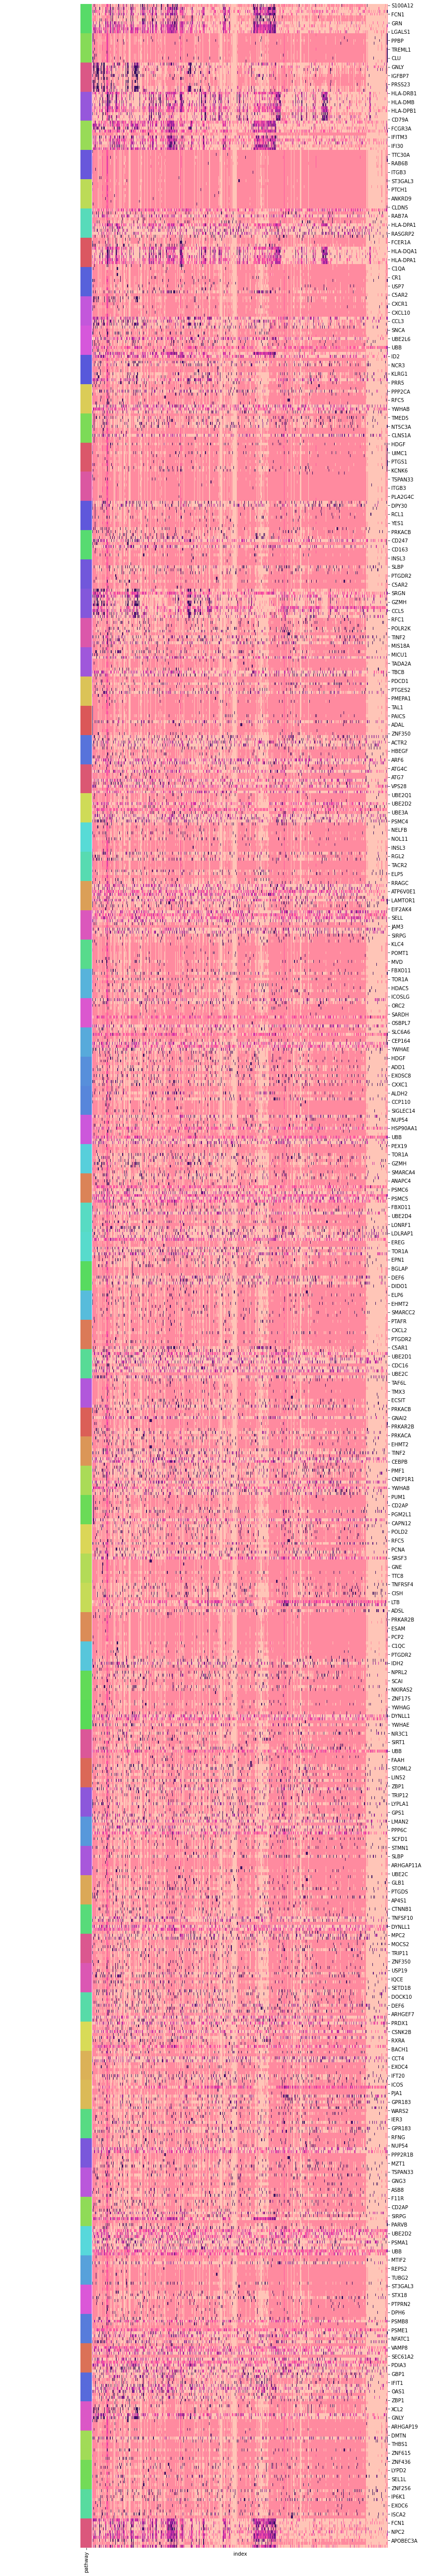

In [210]:
g = sns.clustermap(
    data=np.add(toplot, abs(toplot.min(axis=0))),
    row_cluster=False,
    # cmap="viridis",
    cmap=sns.cubehelix_palette(hue=2),
    robust=True,
    linecolor="black",
    row_colors=pd.DataFrame(pathway_colors.droplevel("pathway")),
    figsize=(12,90),
    # z_score=1,
    xticklabels=False,
)
g.ax_col_dendrogram.set_visible(False)
g.ax_cbar.set_visible(False)
# handles = [Patch(facecolor=pathway_lut[name]) for name in pathway_lut]
# l1 = g.ax_heatmap.legend(
#     handles=handles,
#     labels=pathway_lut.keys(),
#     ncol=2,
#     loc="lower left",
#     bbox_to_anchor=(1.05,0.25),
# )